In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("../MISSION Machine Learning Datasets/Social_Network_Ads.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset["Purchased"].unique()

array([0, 1], dtype=int64)

In [6]:
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:,4].values

In [7]:
from sklearn.cross_validation import train_test_split

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [9]:
## as we need accurate pridiction we will apply feature scaling here
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X_test = sc_X.transform(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
Y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [14]:
 cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

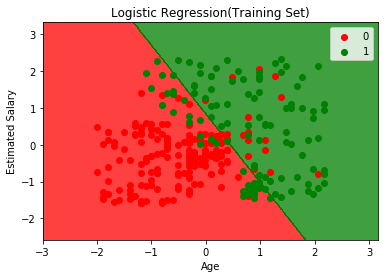

In [16]:
## for visualising the classifier results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1], c = ListedColormap(('red' ,'green'))(i),label = j)
plt.title("Logistic Regression(Training Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

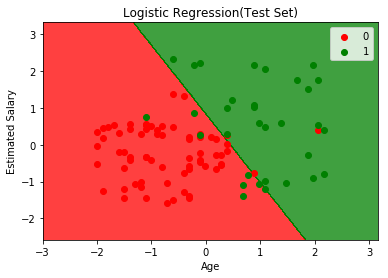

In [17]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1], c = ListedColormap(('red' ,'green'))(i),label = j)
plt.title("Logistic Regression(Test Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()